### Problem statement - Identify the the driving factors or strong indicators behind loan default.  

In [18]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#### Importing Loan file

In [3]:
df = pd.read_csv(r'C:\Users\tyagittt\Downloads\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1. Data Understanding

#### A) Columns and rows

In [4]:
#Number of rows and columns
print('Number of rows in data - ',df.shape[0])
print('Number of columns in data - ',df.shape[1])

Number of rows in data -  1460
Number of columns in data -  81


#### B) Formats of columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### C) Summary of numerical columns

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


#### D) Null analysis

In [7]:
column_names = list(df.isnull().sum()[df.isnull().sum()>0].keys()) #column names having null values
null_values = list(df.isnull().sum()[df.isnull().sum()>0].values) #no. of null values

#creating a dataframe
df_null = pd.DataFrame({'column_names': column_names,'null_values' : null_values})
df_null['percent_of_total'] = round(df_null['null_values']/df.shape[0],2)*100

print('No. of columns having null values - ',df_null.shape[0])
print('---')
print(' *** Below tables shows columns with - Count of null values and % with respect to total rows in data *** ')
df_null.sort_values('percent_of_total', ascending=False).head(5)

No. of columns having null values -  19
---
 *** Below tables shows columns with - Count of null values and % with respect to total rows in data *** 


,column_names,null_values,percent_of_total
16,PoolQC,1453,100.000
18,MiscFeature,1406,96.000
1,Alley,1369,94.000
17,Fence,1179,81.000
10,FireplaceQu,690,47.000


#### E) Outlier Analysis

##### Creating seprate list for categorical and numerical columns

In [8]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['float64','int64']).columns

print('No. of categorical columns - ', len(cat_cols))
print(cat_cols)
print(20*'*')
print('No. of numerical columns - ', len(num_cols))
print(num_cols)

No. of categorical columns -  43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
********************
No. of numerical columns -  38
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivA

##### E.1. Numerical columns - Outlier analysis

In [9]:
#Excluding non-insightful columns 
print(len(num_cols))
#num_cols = [e for e in num_cols if e not in excl]
print(len(num_cols))

38
38


##### E.2. Visual outlier - Box plots for all numeric variables

------ Id -------


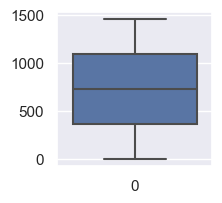

------ MSSubClass -------


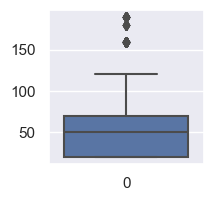

------ LotFrontage -------


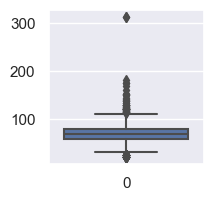

------ LotArea -------


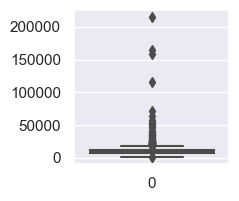

In [10]:
sns.set(rc={'figure.figsize':(2,2)})
for i in num_cols[:4]:
    print('------',i,'-------')
    sns.boxplot(data = df[i])
    plt.show()

##### E.3. Statistical technique (IRQ) to identify columns having outliers
IQR is the range between the first and the third quartiles namely Q1 and Q3: IQR = Q3 – Q1. The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers

In [11]:
#create a function to find outliers using IQR

def find_outliers_IQR(df, num_cols):
    #creating loop to take all numerical columns one-by-one and share outliers in them
    for i in num_cols:
        q1=df[i].quantile(0.25) #First quartile
        q3=df[i].quantile(0.75) #Third quartile
        IQR=q3-q1 #Difference
        
        outliers = df[((df[i]<(q1-1.5*IQR)) | (df[i]>(q3+1.5*IQR)))]
        
        print('In "',i,'" column',' no. of outlier are - ',len(outliers))

#Applying function on numerical columns 
find_outliers_IQR(df, num_cols)

In " Id " column  no. of outlier are -  0
In " MSSubClass " column  no. of outlier are -  103
In " LotFrontage " column  no. of outlier are -  88
In " LotArea " column  no. of outlier are -  69
In " OverallQual " column  no. of outlier are -  2
In " OverallCond " column  no. of outlier are -  125
In " YearBuilt " column  no. of outlier are -  7
In " YearRemodAdd " column  no. of outlier are -  0
In " MasVnrArea " column  no. of outlier are -  96
In " BsmtFinSF1 " column  no. of outlier are -  7
In " BsmtFinSF2 " column  no. of outlier are -  167
In " BsmtUnfSF " column  no. of outlier are -  29
In " TotalBsmtSF " column  no. of outlier are -  61
In " 1stFlrSF " column  no. of outlier are -  20
In " 2ndFlrSF " column  no. of outlier are -  2
In " LowQualFinSF " column  no. of outlier are -  26
In " GrLivArea " column  no. of outlier are -  31
In " BsmtFullBath " column  no. of outlier are -  1
In " BsmtHalfBath " column  no. of outlier are -  82
In " FullBath " column  no. of outlier ar

##### F) Variance in column values

In [12]:
print('Categorical columns')
for i in cat_cols:
    print('no. of unique values in',i,' - ',df[i].nunique())

Categorical columns
no. of unique values in MSZoning  -  5
no. of unique values in Street  -  2
no. of unique values in Alley  -  2
no. of unique values in LotShape  -  4
no. of unique values in LandContour  -  4
no. of unique values in Utilities  -  2
no. of unique values in LotConfig  -  5
no. of unique values in LandSlope  -  3
no. of unique values in Neighborhood  -  25
no. of unique values in Condition1  -  9
no. of unique values in Condition2  -  8
no. of unique values in BldgType  -  5
no. of unique values in HouseStyle  -  8
no. of unique values in RoofStyle  -  6
no. of unique values in RoofMatl  -  8
no. of unique values in Exterior1st  -  15
no. of unique values in Exterior2nd  -  16
no. of unique values in MasVnrType  -  4
no. of unique values in ExterQual  -  4
no. of unique values in ExterCond  -  5
no. of unique values in Foundation  -  6
no. of unique values in BsmtQual  -  4
no. of unique values in BsmtCond  -  4
no. of unique values in BsmtExposure  -  4
no. of unique

In [13]:
print('Numerical columns')
for i in num_cols:
    print('no. of unique values in',i,' - ',df[i].nunique())

Numerical columns
no. of unique values in Id  -  1460
no. of unique values in MSSubClass  -  15
no. of unique values in LotFrontage  -  110
no. of unique values in LotArea  -  1073
no. of unique values in OverallQual  -  10
no. of unique values in OverallCond  -  9
no. of unique values in YearBuilt  -  112
no. of unique values in YearRemodAdd  -  61
no. of unique values in MasVnrArea  -  327
no. of unique values in BsmtFinSF1  -  637
no. of unique values in BsmtFinSF2  -  144
no. of unique values in BsmtUnfSF  -  780
no. of unique values in TotalBsmtSF  -  721
no. of unique values in 1stFlrSF  -  753
no. of unique values in 2ndFlrSF  -  417
no. of unique values in LowQualFinSF  -  24
no. of unique values in GrLivArea  -  861
no. of unique values in BsmtFullBath  -  4
no. of unique values in BsmtHalfBath  -  3
no. of unique values in FullBath  -  4
no. of unique values in HalfBath  -  3
no. of unique values in BedroomAbvGr  -  8
no. of unique values in KitchenAbvGr  -  4
no. of unique v

##### No columns has unique values as 1

### ** Insights From Data Understanding - Quality Check**
1. Rows and columns - 1460 rows & 81 columns
2. Data Type: Most columns are float/integer
3. Null value analysis - 5 columns has null values. Columns "PoolQC" has 100% null and column "MiscFeature" has 96% null values
4. Outlier analysis - Based on IQR, there are multiple columns having outlier values
5. Variance analysis in column values: 
    1. Cat. col - No column having single values
    2. Num. col - No column having single values
 


*****************************************************************************************************************************

### Data Exploration

#### 1. Numerical columns

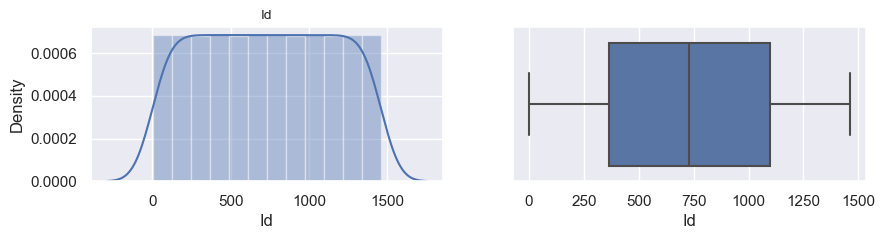

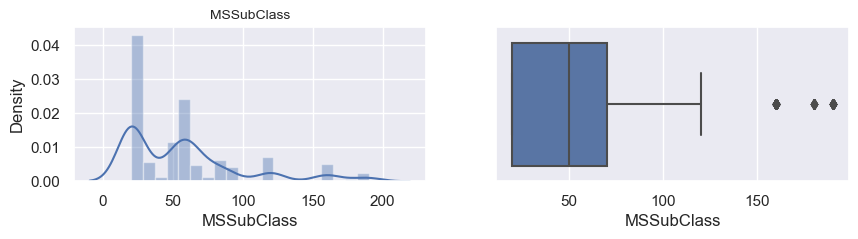

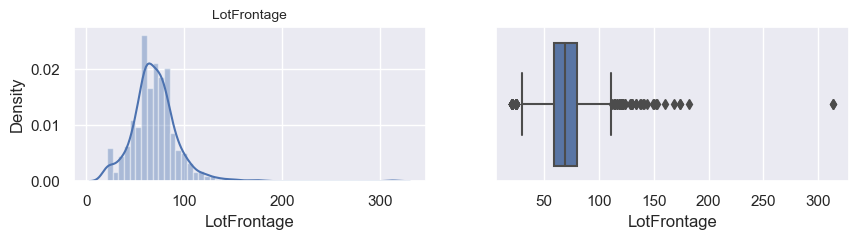

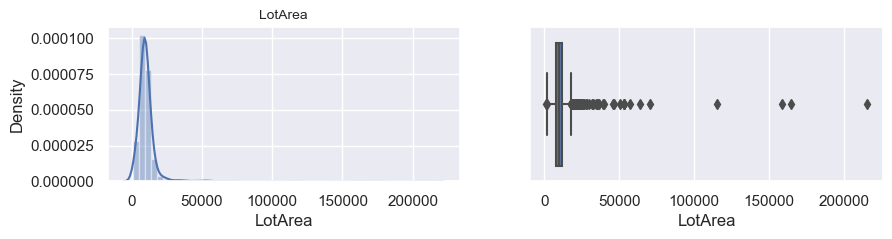

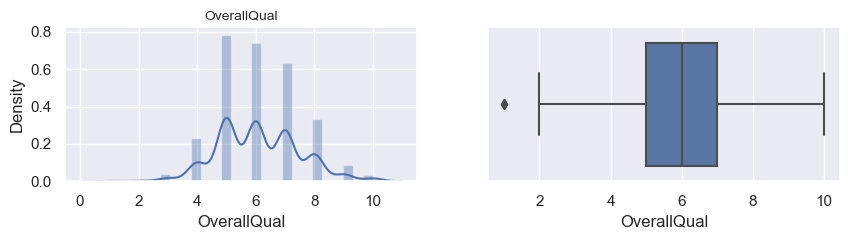

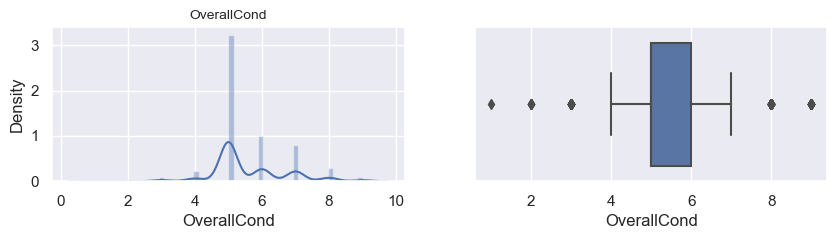

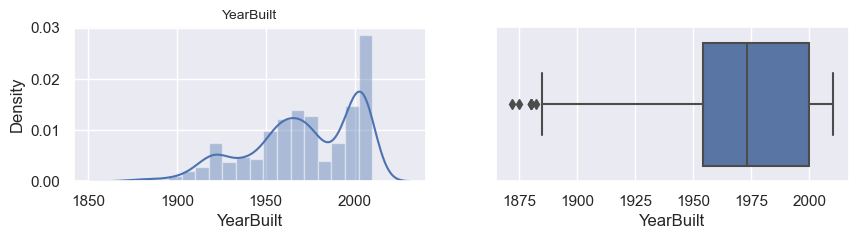

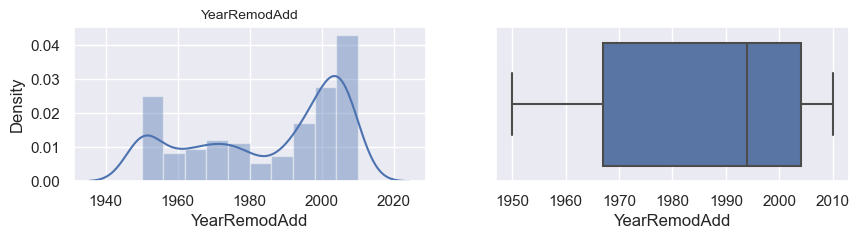

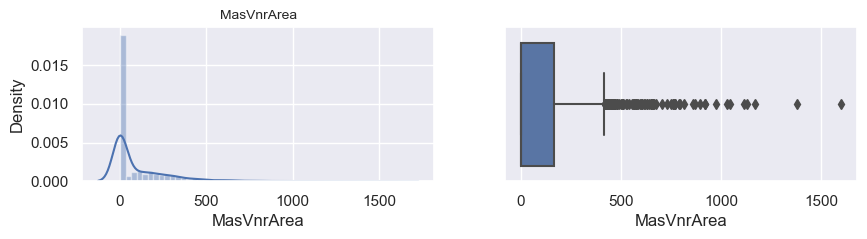

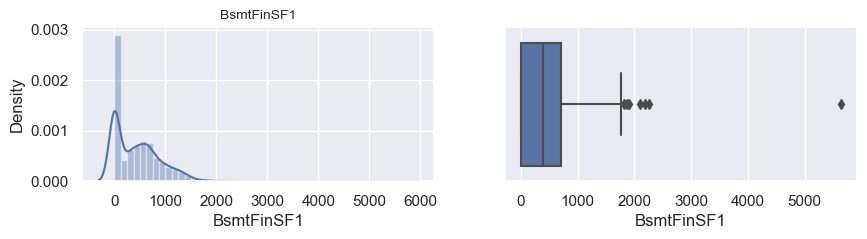

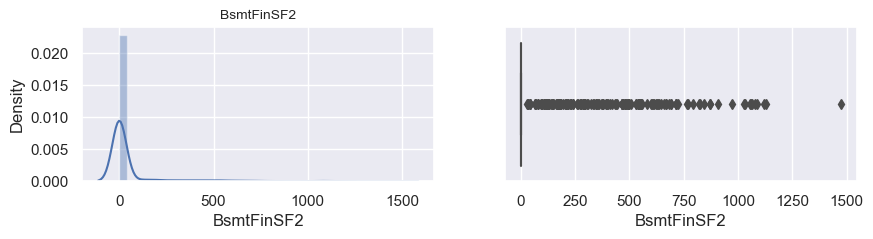

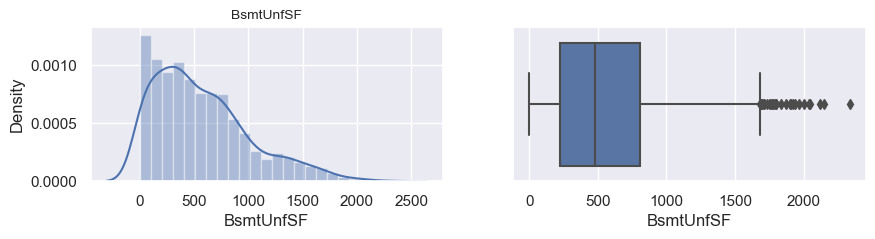

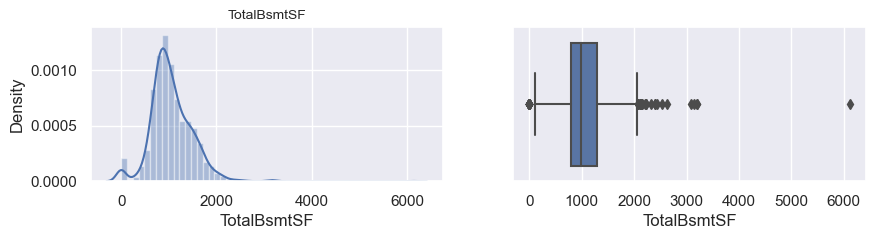

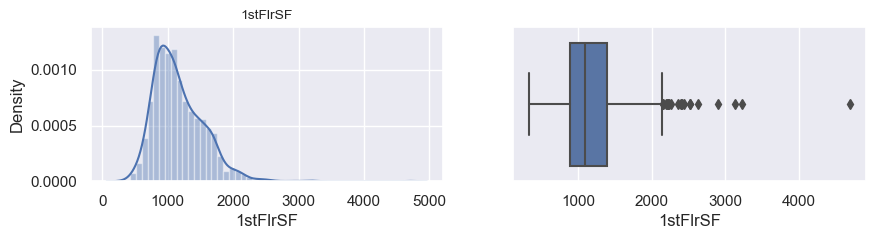

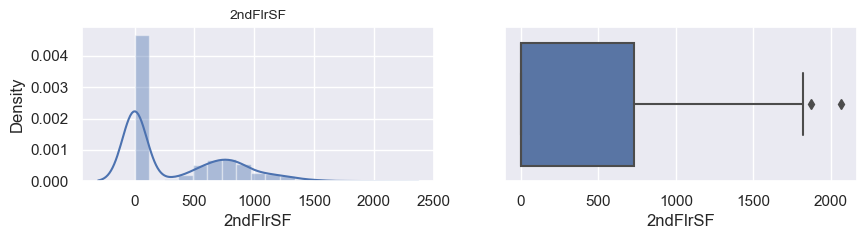

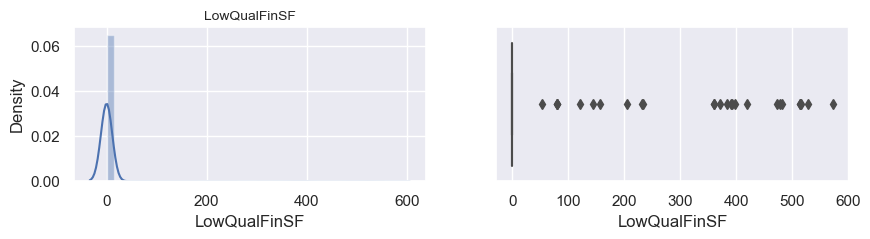

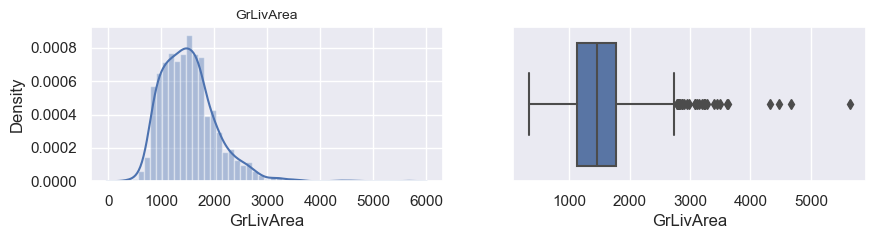

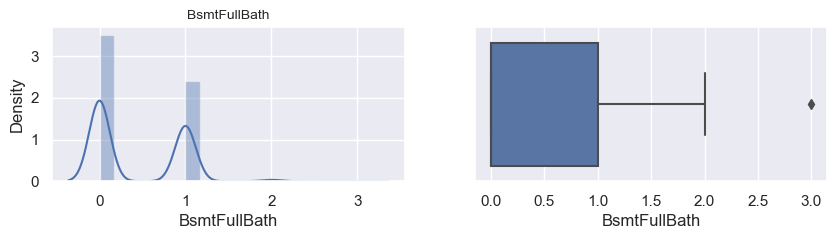

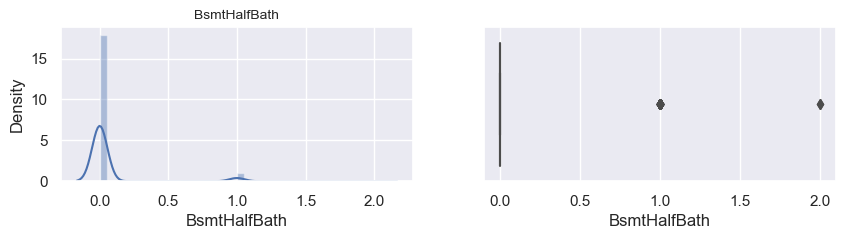

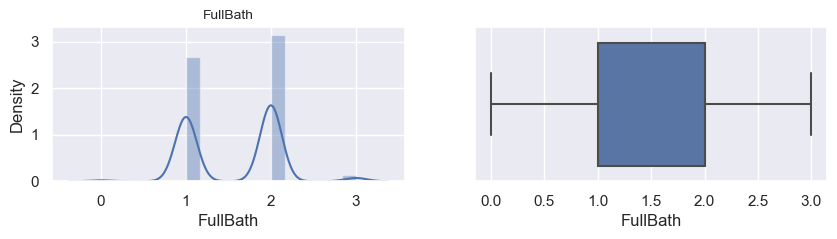

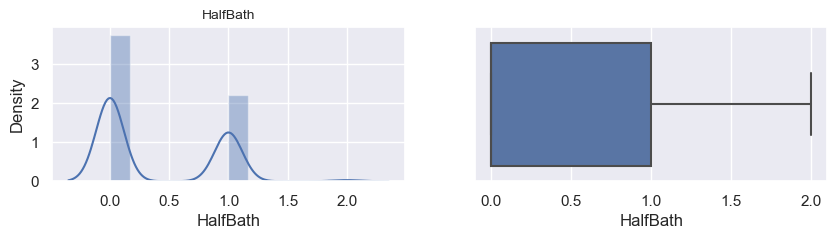

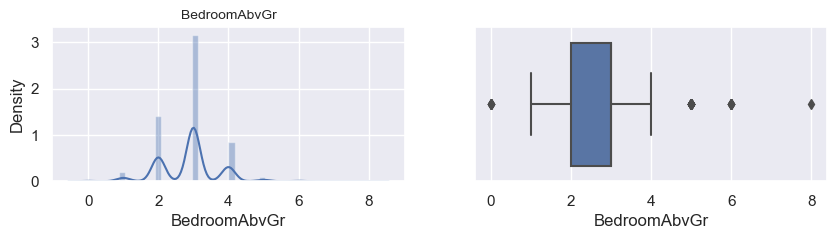

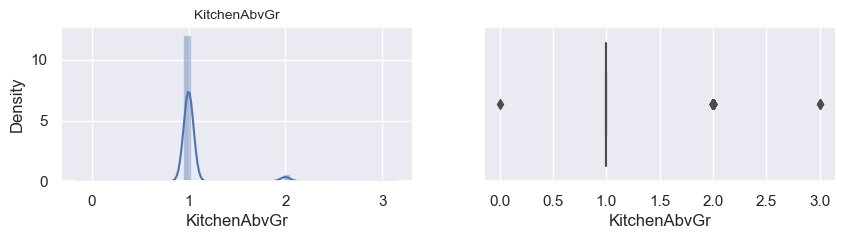

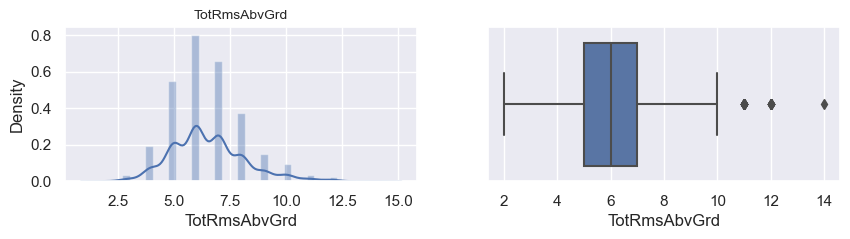

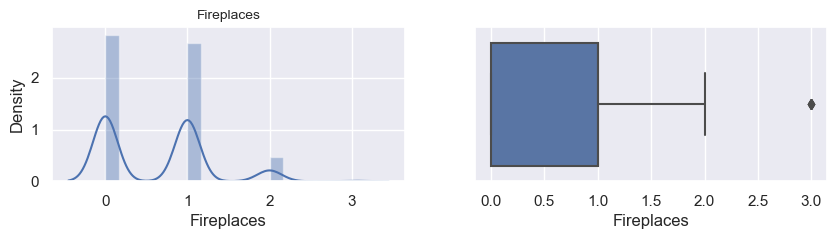

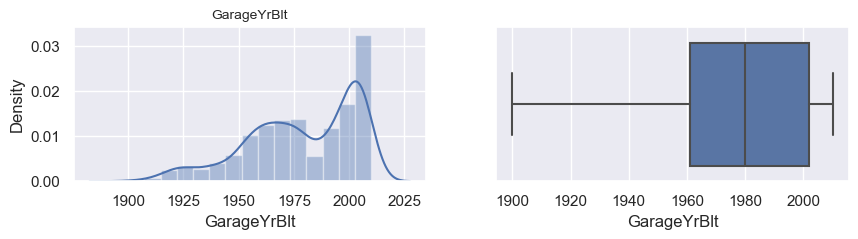

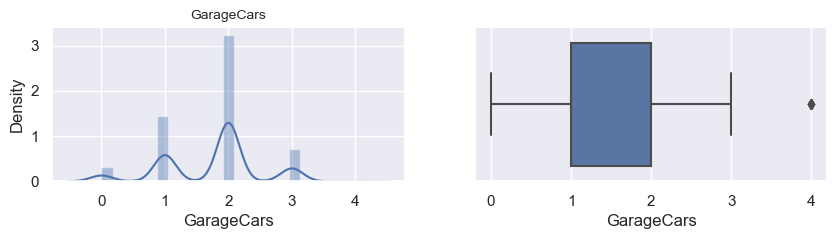

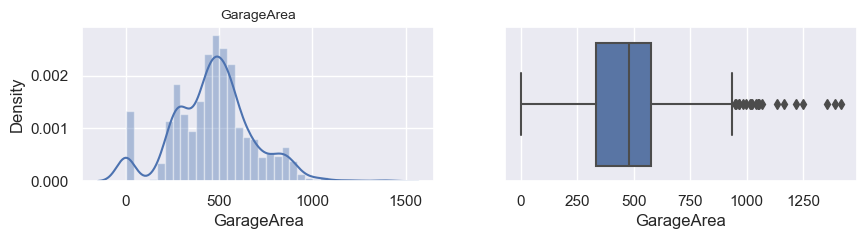

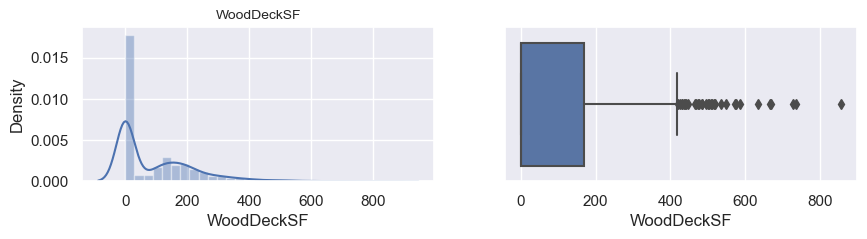

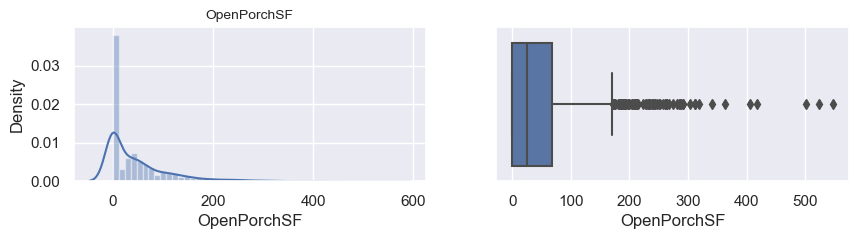

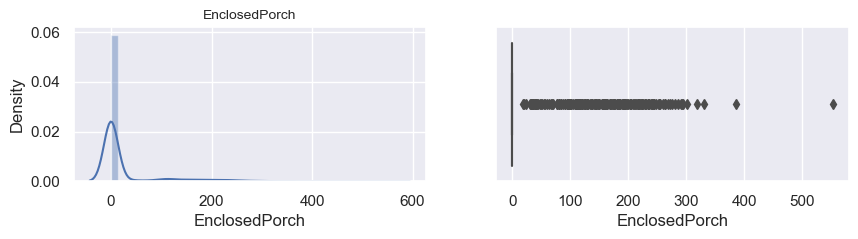

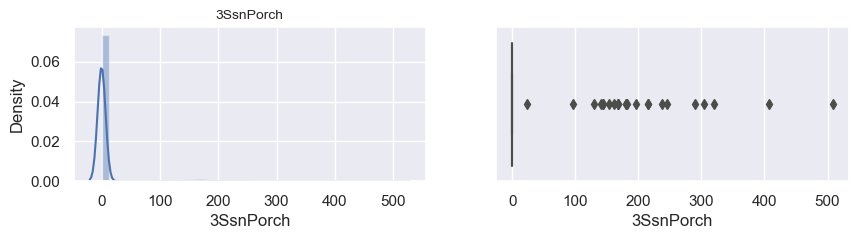

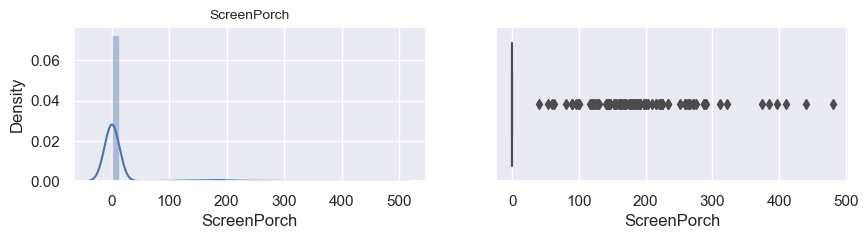

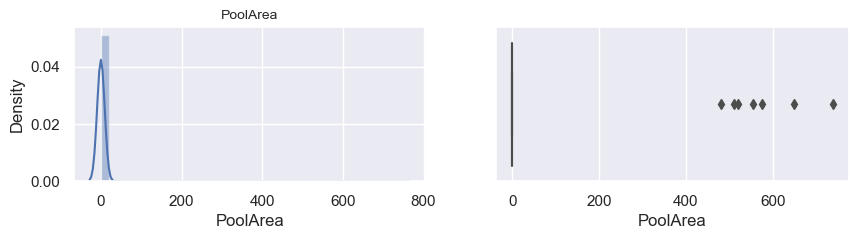

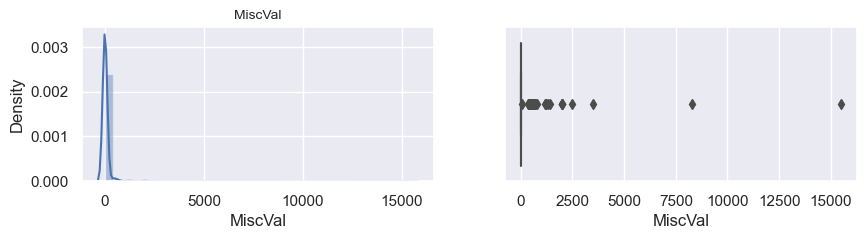

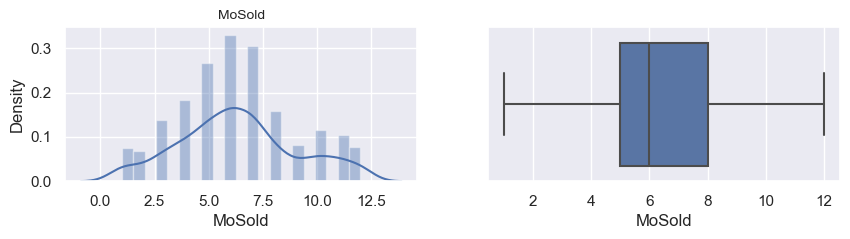

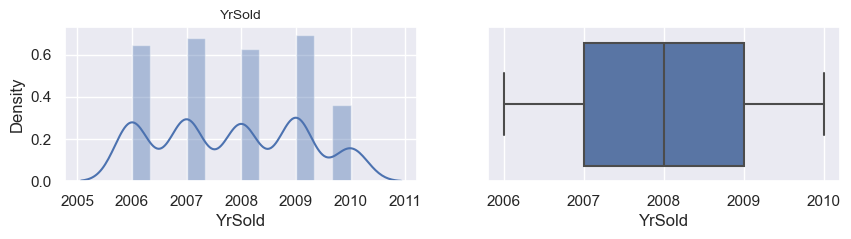

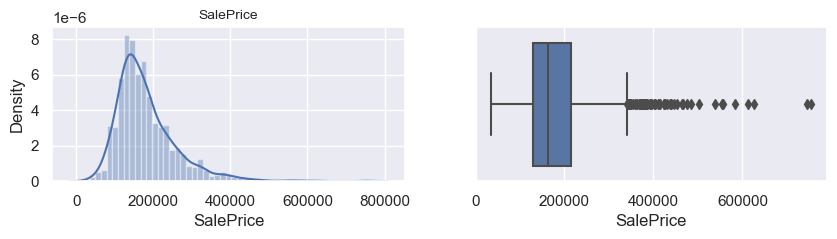

In [29]:
for col in df[num_cols].columns:
    plt.figure(figsize=(10,2))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 10})
    sns.distplot(df[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.show() 

#### 2. Categorical columns

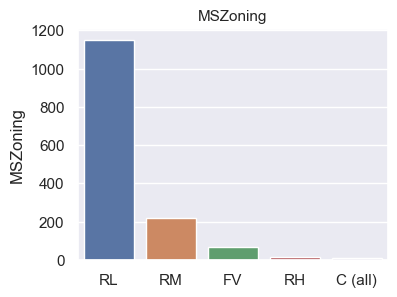

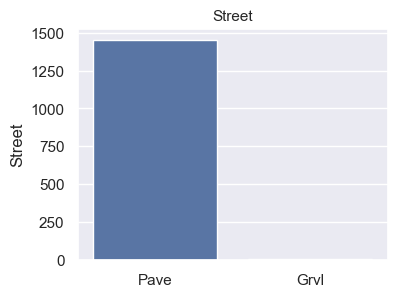

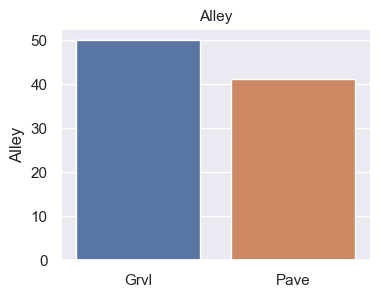

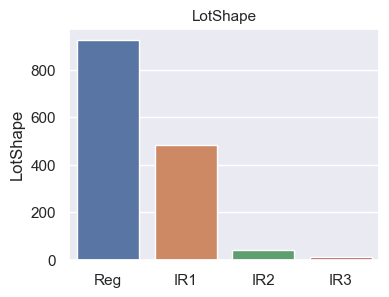

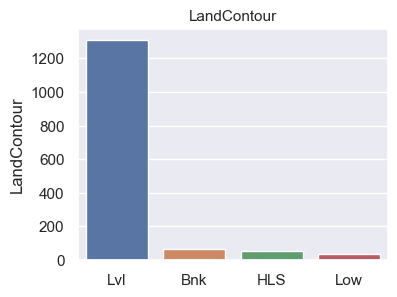

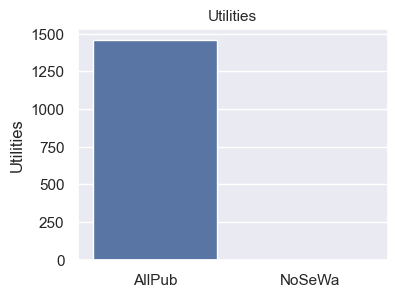

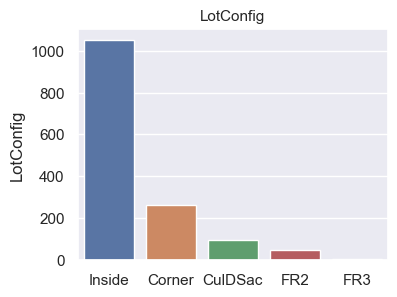

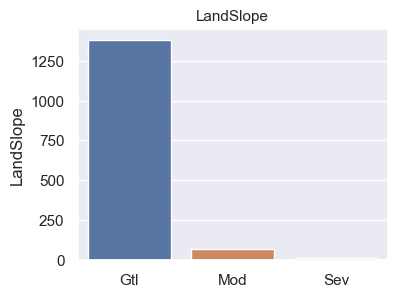

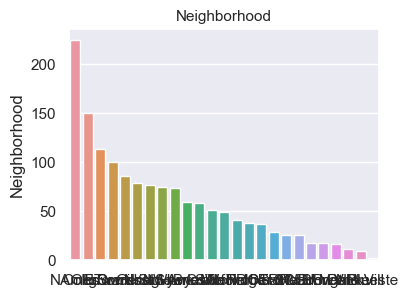

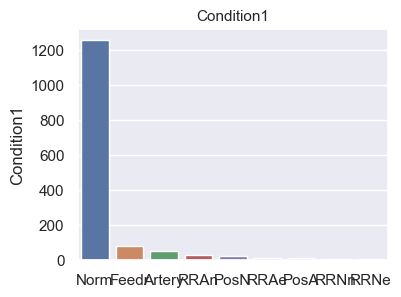

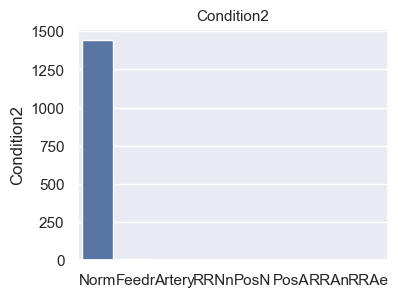

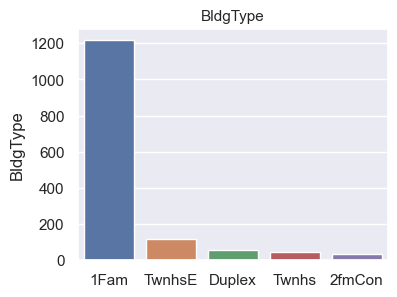

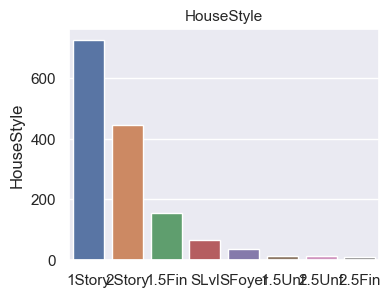

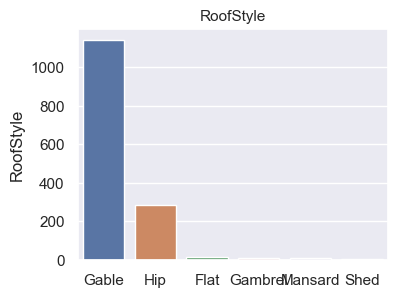

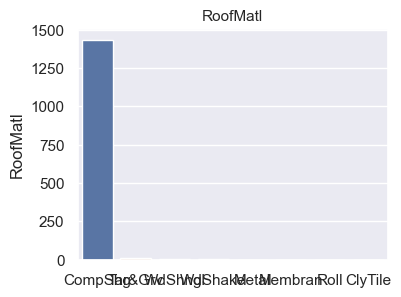

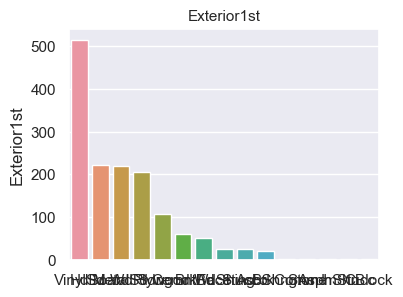

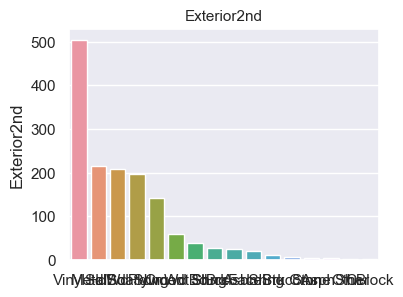

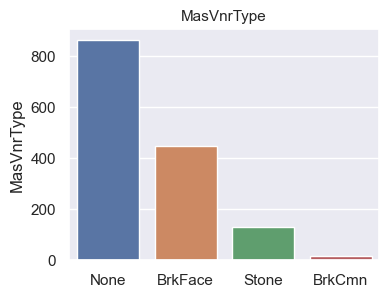

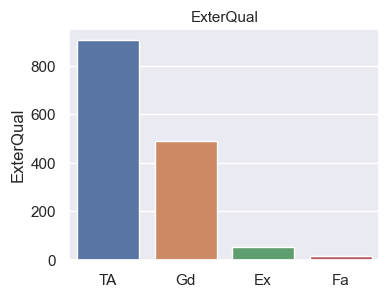

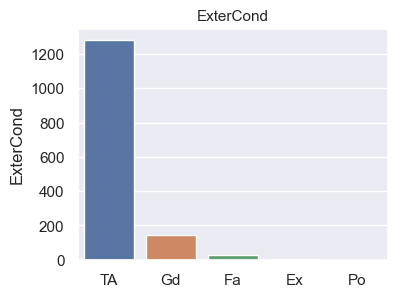

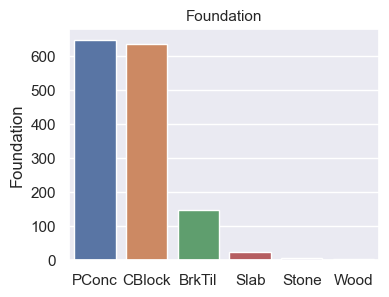

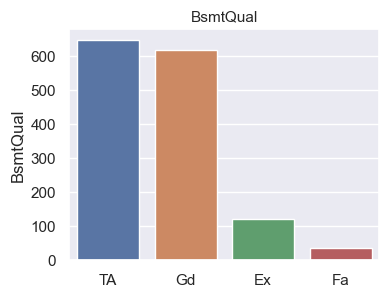

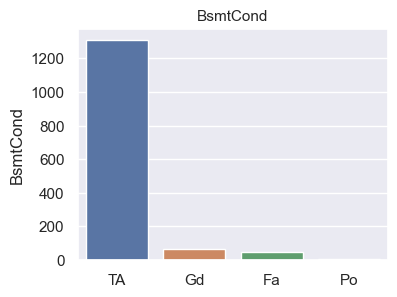

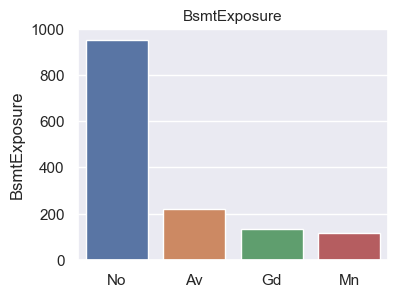

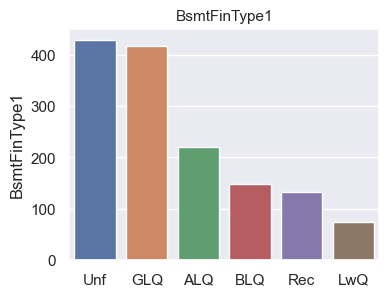

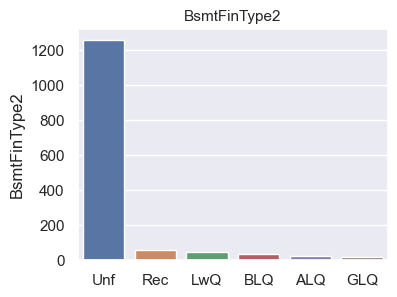

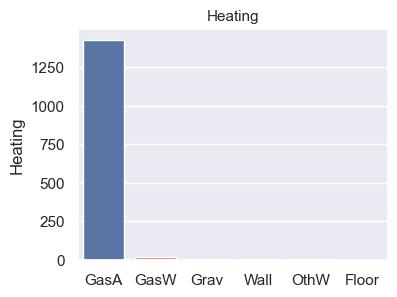

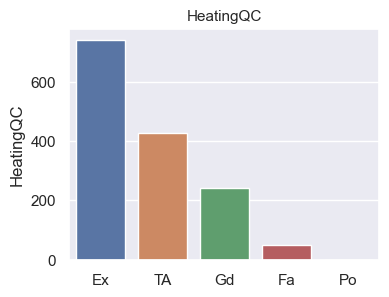

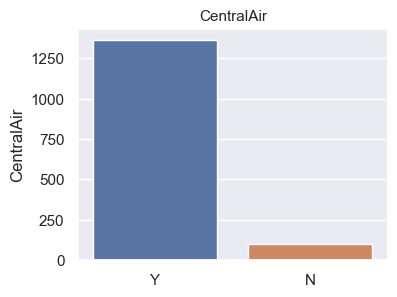

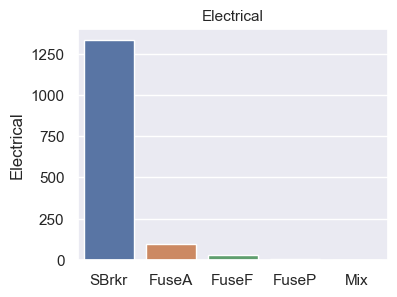

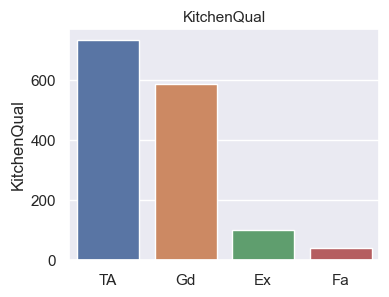

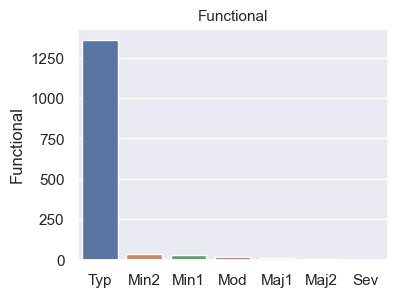

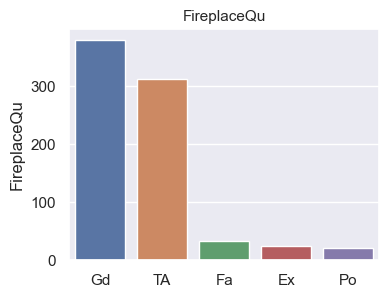

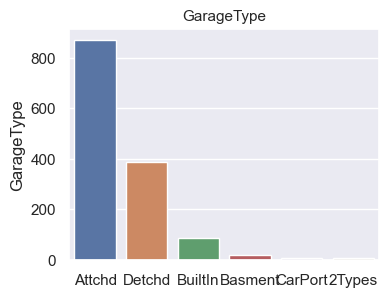

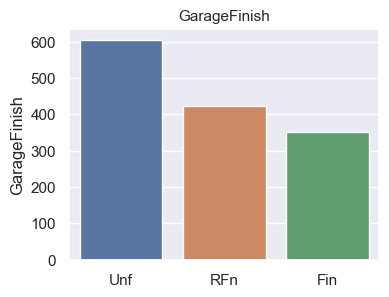

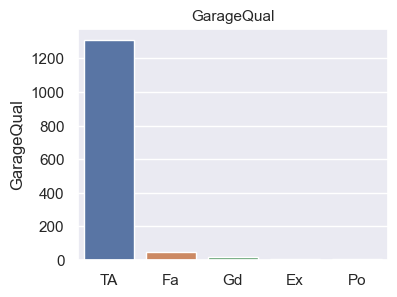

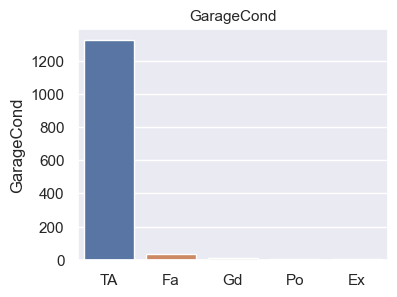

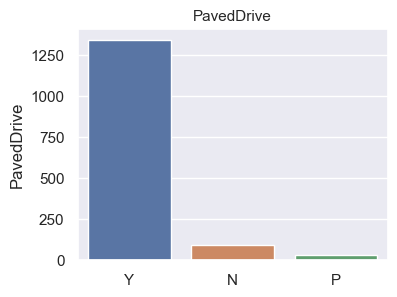

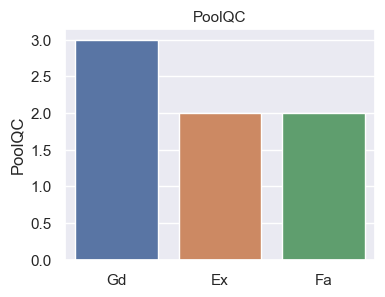

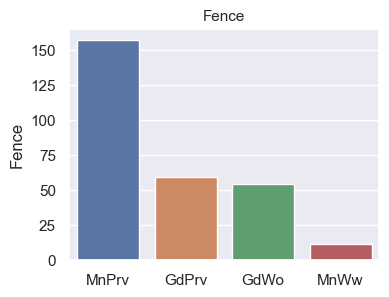

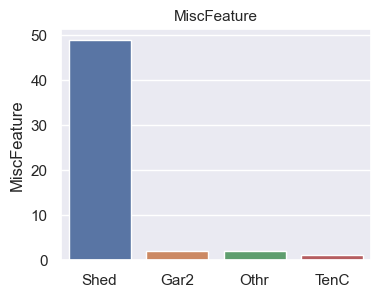

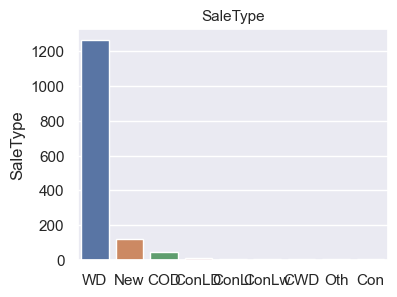

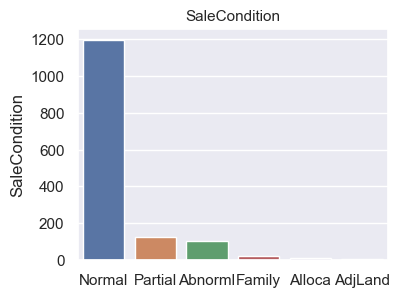

In [22]:
for col in df[cat_cols].columns:
    plt.figure(figsize=(4,3))
    plt.title(col, fontdict={'fontsize': 11})
    sns.barplot(df[col].value_counts().index, df[col].value_counts())
    plt.show()


### Correlation Matrix

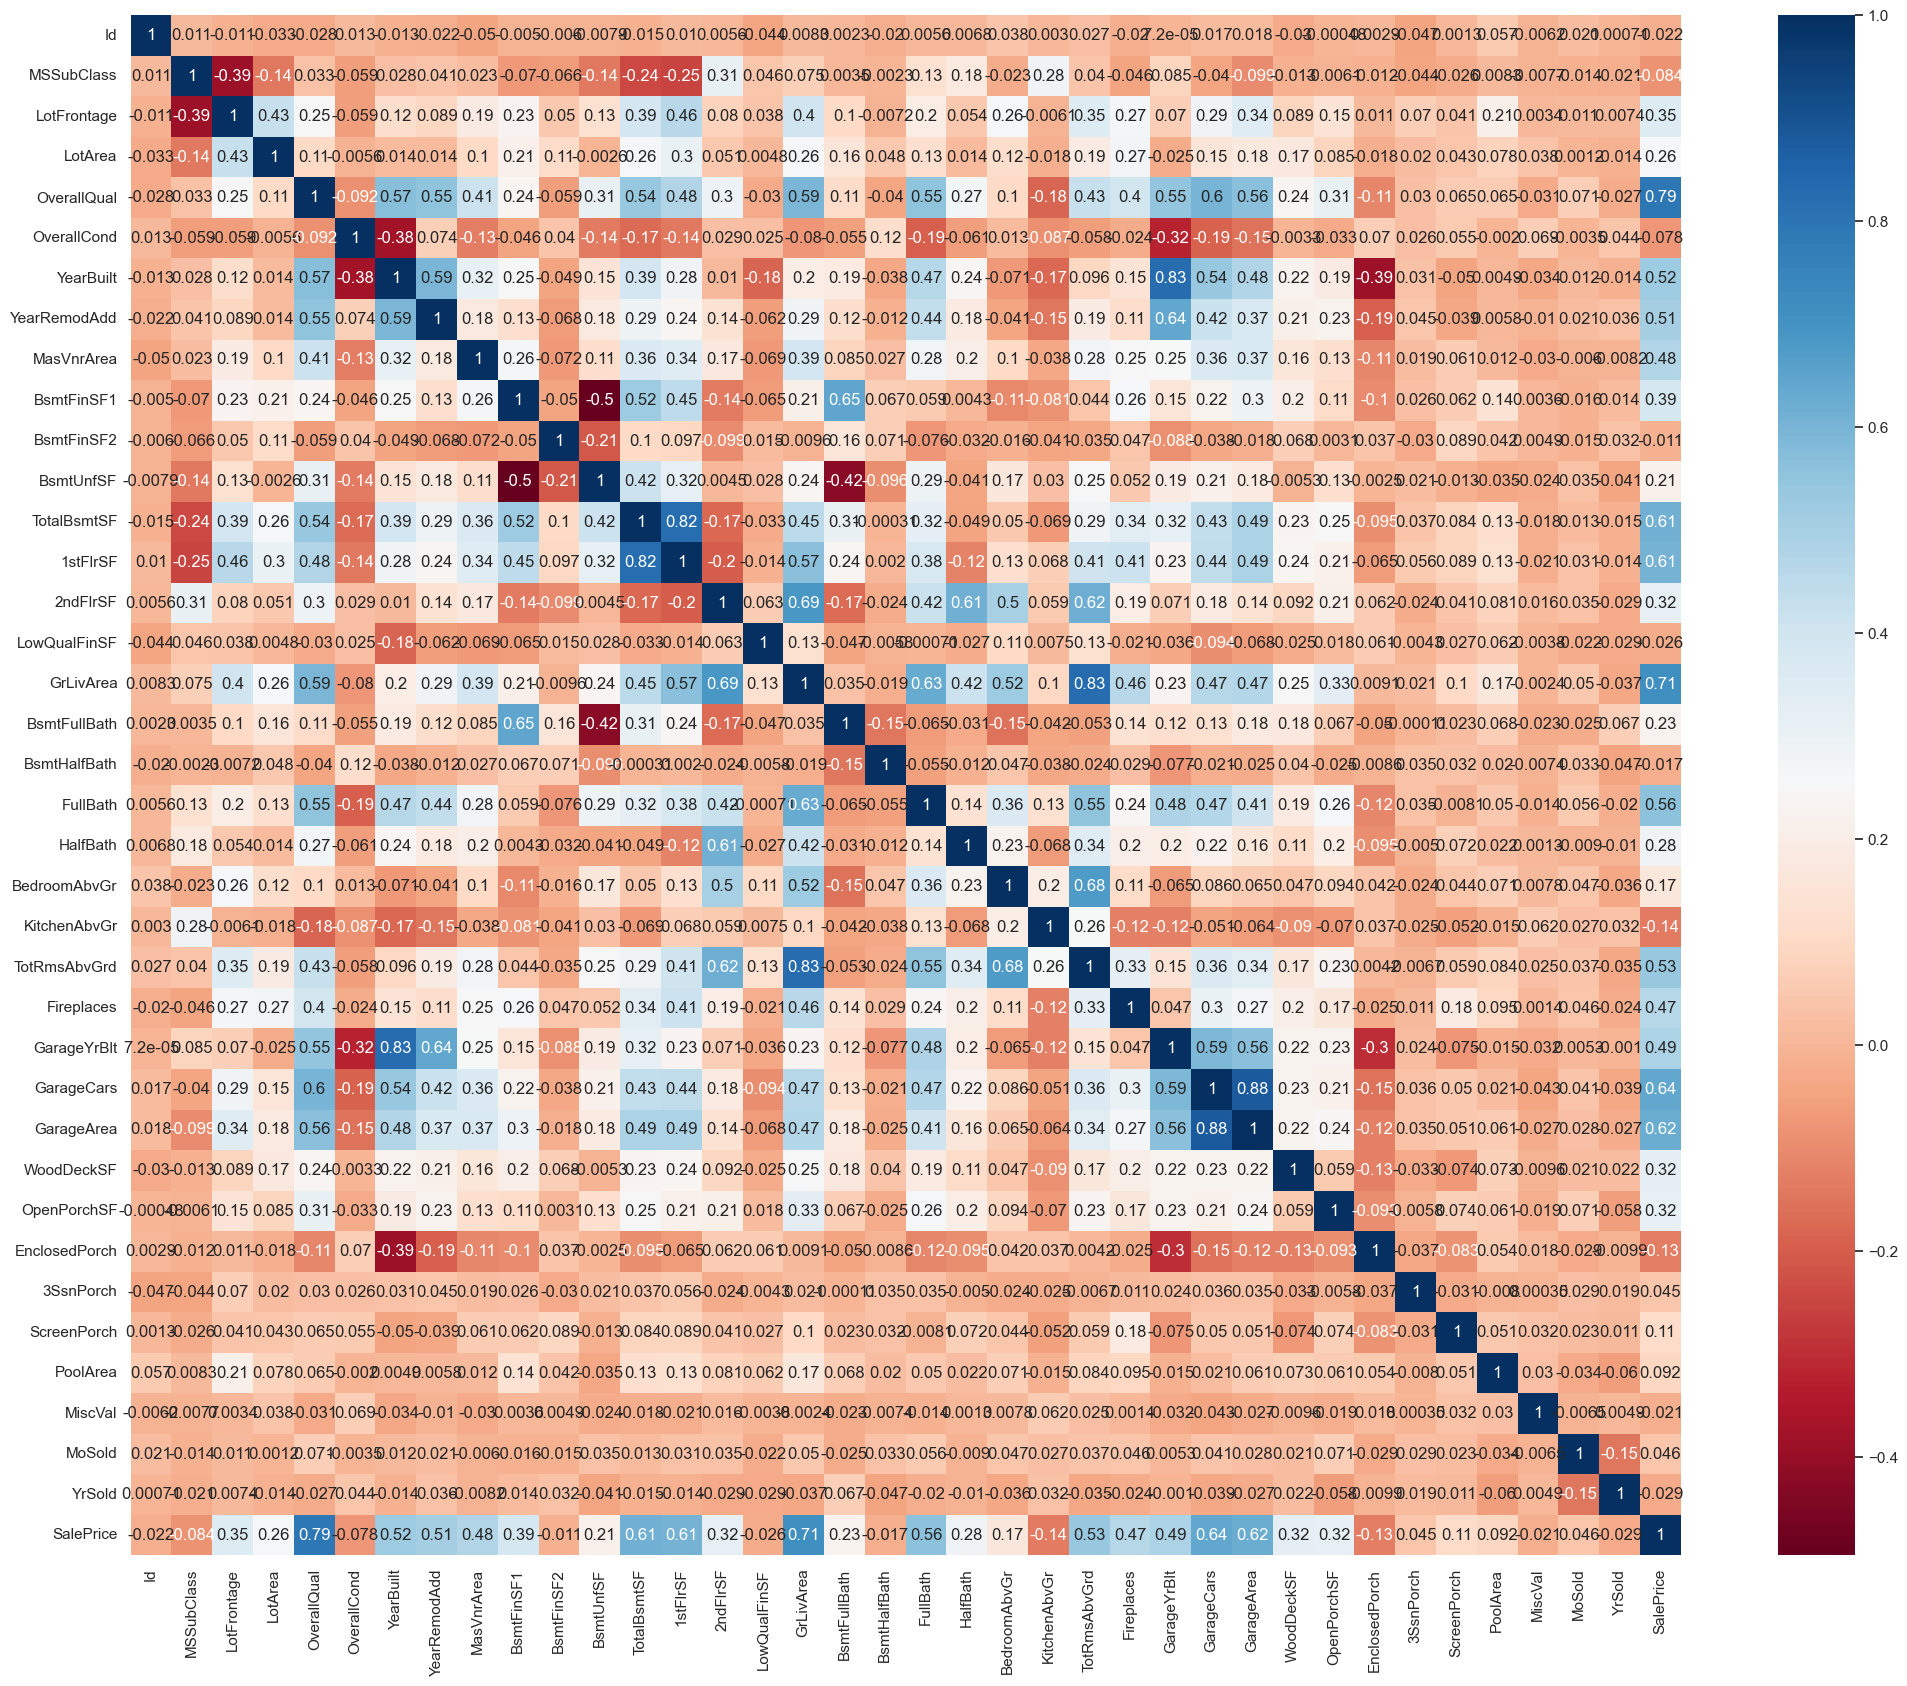

In [23]:
plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.show()

### ** Insights From EDA**
1. Numerical columns
    1. Skewed and a lot outlier - LotArea, YearBuilt, MasVnrArea, GarageYrBlt, and MOSold
    2. Less skewed and less outlier - OverallQual, GRLIvArea, FullBatch, and OpenPorchSF

2. Categorical columns:
    1. One prominent categorical value - Street, Utilities, Condition2, and Heating, 
    2. Distributed count of categorical values - Alley, Lotshape, Neighbourhood, Buildingtype, Housestyle, Foundation, and KitchenQual
    
3. High Correlation: SalePrice is highly correlated with GrLivArea, GarageCars and GarageArea.


### Data Cleaning and manuplation

#### 1. Creating new column: 

In [30]:
df['Age'] = df['YrSold'] - df['YearBuilt']
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

#### 2. Missing value Treatment: 

In [32]:
#Columns having missign values
df.isna().sum()[df.isna().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [40]:
df_null.sort_values('percent_of_total', ascending=False)

,column_names,null_values,percent_of_total
16,PoolQC,1453,100.000
18,MiscFeature,1406,96.000
1,Alley,1369,94.000
17,Fence,1179,81.000
10,FireplaceQu,690,47.000
0,LotFrontage,259,18.000
11,GarageType,81,6.000
12,GarageYrBlt,81,6.000
13,GarageFinish,81,6.000
14,GarageQual,81,6.000


In [35]:
#Dropping columns havign more than 45% missing values
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [39]:
#Checking no. columns
df.shape

(1460, 75)

In [41]:
#Numerical columns - mean
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

In [78]:
#Categorical columns - Mode
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0], inplace=True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace=True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace=True)

In [82]:
#Checking if there is any NA values
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

#### 2. Correcting the columns datatype

In [83]:
## Convert three columns to 'object' type as mentioned above
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
## Convert two columns to 'numeric' type as mentioned above
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

#### 2. Outlier Treatment

In [94]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['float64','int64']).columns

print('No. of categorical columns - ', len(cat_cols))
print(cat_cols)
print(20*'*')
print('No. of numerical columns - ', len(num_cols))
print(num_cols)

No. of categorical columns -  41
Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')
********************
No. of numerical columns -  34
Index(['Id', 'LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomA

In [95]:
## Outlier treatment - Keeping the range from 5% at lower bound and 95% at upper bound
for col in df[num_cols].columns:
    df[col][df[col] <= df[col].quantile(0.05)] = df[col].quantile(0.05)
    df[col][df[col] >= df[col].quantile(0.95)] = df[col].quantile(0.95)

#### 3. Create Dummy values : 

In [96]:
#Creating dummy variables
#Drop first -  will drop one column value so if there are two values in one categorical column (Men and Women) then it will create only one new column (Men or Women)
df_new = pd.get_dummies(df, drop_first=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 261 entries, Id to SaleCondition_Partial
dtypes: float64(14), int64(20), uint8(227)
memory usage: 711.6 KB


In [98]:
print(df_new.shape)
print('After dummy variable creation: 81 columns > 261 columns')

(1460, 261)
After dummy variable creation: 81 columns > 261 columns


### Model preperation

#### 1. Creating X and y for data split

In [101]:
X = df_new.drop(["Id", "SalePrice"], axis=1).copy()
X.head(2)

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,Sale

In [102]:
y = df_new["SalePrice"].copy()
y.head()

0   208500.000
1   181500.000
2   223500.000
3   140000.000
4   250000.000
Name: SalePrice, dtype: float64

#### 2. Splitting the values

In [106]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 259)
(1168,)
(292, 259)
(292,)


#### 2. Scaling - Using MinMax scaler to transform

In [107]:
## Num cols
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [109]:
## Scale instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Scaling variable
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Model building

### 1. Ridge Regression

In [111]:
from sklearn.linear_model import Ridge
# Tuning alpha values
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [130]:
cv_outcome = pd.DataFrame(model_cv.cv_results_)
cv_outcome = cv_outcome[cv_outcome['param_alpha']<=5]
cv_outcome.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.330,0.041,0.008,0.004,0.000,{'alpha': 0.0001},-13547.696,-16932.085,-15801.852,-16336.535,-14260.660,-15375.766,1273.739,26,-10082.792,-9433.087,-9972.291,-9691.735,-10174.541,-9870.889,272.454
1,0.313,0.015,0.007,0.004,0.001,{'alpha': 0.001},-13547.257,-16932.079,-15801.413,-16335.327,-14260.343,-15375.284,1273.708,25,-10082.811,-9433.089,-9972.306,-9691.724,-10174.568,-9870.900,272.465
2,0.306,0.018,0.006,0.003,0.010,{'alpha': 0.01},-13542.868,-16931.957,-15797.488,-16323.101,-14257.172,-15370.517,1273.394,24,-10083.139,-9433.250,-9972.606,-9691.796,-10174.896,-9871.137,272.550
3,0.316,0.015,0.008,0.002,0.050,{'alpha': 0.05},-13523.389,-16931.095,-15784.105,-16268.730,-14243.075,-15350.079,1272.333,23,-10084.767,-9434.459,-9974.016,-9692.139,-10176.359,-9872.348,272.801
4,0.316,0.019,0.010,0.002,0.100,{'alpha': 0.1},-13499.123,-16930.038,-15771.009,-16234.023,-14225.709,-15331.980,1276.199,22,-10086.856,-9436.260,-9975.892,-9692.629,-10178.207,-9873.969,273.036


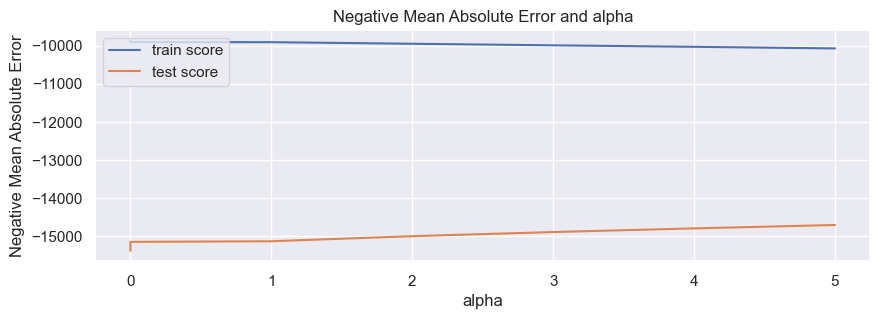

In [132]:
plt.figure(figsize=(10,3))
# # Test and train score values based on Alpha
cv_outcome['param_alpha'] = cv_outcome['param_alpha'].astype('int32')

# plotting
plt.plot(cv_outcome['param_alpha'], cv_outcome['mean_train_score'])
plt.plot(cv_outcome['param_alpha'], cv_outcome['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [114]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.01188883e+03,  4.03992449e+03,  2.77448417e+03, -2.45942866e+00,
        8.24750798e+02, -1.10620737e+03, -4.52052179e+03,  1.15553709e+04,
       -1.18712916e+03,  4.21821223e+03,  0.00000000e+00,  2.00748524e+04,
        1.03154994e+03, -5.77723389e+02,  4.25102941e+02,  6.75345468e+02,
        4.14249599e+02,  0.00000000e+00, -1.71238299e+01,  2.57847645e+03,
        9.12324310e+02,  3.26614511e+03,  1.93181672e+03,  2.18012332e+03,
        1.34607099e+03,  1.58301900e+02,  0.00000000e+00,  1.21869050e+03,
        0.00000000e+00,  0.00000000e+00, -4.17966788e+02, -8.60082694e+03,
        5.03970138e+00,  4.42666341e+03,  5.22797642e+03, -1.42505094e+02,
        1.15793528e+03,  5.30867448e+03,  1.14260158e+04, -5.22109954e+03,
       -4.19474300e+03, -1.06216731e+04, -3.27473885e+03, -9.21493422e+03,
       -2.00310512e+03, -7.35022519e+03,  1.25866236e+04,  6.64925508e+03,
        2.85587146e+03, -4.78991943e+02,  1.06127510e+03,  2.35813064e+03,
       -4.71676391e+03, -

In [133]:
# ridge model parameters
model_param_result = list(ridge.coef_)
model_param_result.insert(0, ridge.intercept_)
model_param_result = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_param_result))

[('constant', -70478.233),
 ('LotFrontage', 871.858),
 ('LotArea', 4399.873),
 ('YearRemodAdd', 2922.349),
 ('MasVnrArea', 363.872),
 ('BsmtFinSF1', -1051.223),
 ('BsmtFinSF2', -2100.72),
 ('BsmtUnfSF', -6215.657),
 ('TotalBsmtSF', 13708.487),
 ('1stFlrSF', -1807.717),
 ('2ndFlrSF', 4612.135),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 20695.843),
 ('BsmtFullBath', 1037.407),
 ('BsmtHalfBath', -147.51),
 ('FullBath', -35.394),
 ('HalfBath', -8.384),
 ('BedroomAbvGr', 234.106),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 178.055),
 ('Fireplaces', 2313.746),
 ('GarageYrBlt', 748.126),
 ('GarageCars', 2398.079),
 ('GarageArea', 2821.792),
 ('WoodDeckSF', 2001.25),
 ('OpenPorchSF', 1553.006),
 ('EnclosedPorch', 253.853),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 946.354),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', -571.959),
 ('Age', -11026.539),
 ('MSSubClass_30', 1344.711),
 ('MSSubClass_40', 7109.877),
 ('MSSubClass_45', -2448.309),
 ('MSSubClass_50', 3497.267),
 ('MSSubClass_60', 2024.85

In [117]:
# ridge regression
from sklearn import metrics
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9403780244324407
0.9130124872241996


In [134]:
print('Model RMSE is :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Model RMSE is : 24925.17784944741


### 2. Lasso Regression

In [120]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1168, 259)
y_train (1168,)


In [122]:
# Applying Lasso
from sklearn.linear_model import Lasso
# Tuning alpha
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [135]:
# cv_results
cv_lasso_results = pd.DataFrame(model_cv.cv_results_)
cv_lasso_results = cv_lasso_results[cv_lasso_results['param_alpha']<=1]
cv_lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.330,0.041,0.008,0.004,0.000,{'alpha': 0.0001},-13547.696,-16932.085,-15801.852,-16336.535,-14260.660,-15375.766,1273.739,26,-10082.792,-9433.087,-9972.291,-9691.735,-10174.541,-9870.889,272.454
1,0.313,0.015,0.007,0.004,0.001,{'alpha': 0.001},-13547.257,-16932.079,-15801.413,-16335.327,-14260.343,-15375.284,1273.708,25,-10082.811,-9433.089,-9972.306,-9691.724,-10174.568,-9870.900,272.465
2,0.306,0.018,0.006,0.003,0.010,{'alpha': 0.01},-13542.868,-16931.957,-15797.488,-16323.101,-14257.172,-15370.517,1273.394,24,-10083.139,-9433.250,-9972.606,-9691.796,-10174.896,-9871.137,272.550
3,0.316,0.015,0.008,0.002,0.050,{'alpha': 0.05},-13523.389,-16931.095,-15784.105,-16268.730,-14243.075,-15350.079,1272.333,23,-10084.767,-9434.459,-9974.016,-9692.139,-10176.359,-9872.348,272.801
4,0.316,0.019,0.010,0.002,0.100,{'alpha': 0.1},-13499.123,-16930.038,-15771.009,-16234.023,-14225.709,-15331.980,1276.199,22,-10086.856,-9436.260,-9975.892,-9692.629,-10178.207,-9873.969,273.036


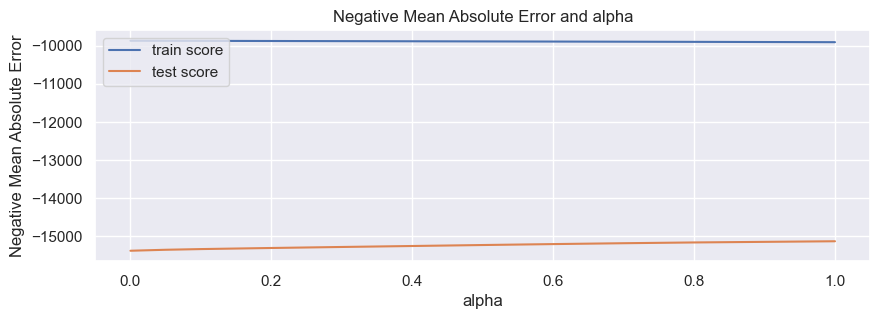

In [138]:
plt.figure(figsize=(10,3))
# Test and train score values based on Alpha
cv_lasso_results['param_alpha'] = cv_lasso_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_lasso_results['param_alpha'], cv_lasso_results['mean_train_score'])
plt.plot(cv_lasso_results['param_alpha'], cv_lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [139]:
#Based on the above values
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([ 8.71857509e+02,  4.39987279e+03,  2.92234881e+03,  3.63871917e+02,
       -1.05122314e+03, -2.10071964e+03, -6.21565687e+03,  1.37084873e+04,
       -1.80771652e+03,  4.61213521e+03,  0.00000000e+00,  2.06958429e+04,
        1.03740689e+03, -1.47510130e+02, -3.53935047e+01, -8.38359310e+00,
        2.34105667e+02,  0.00000000e+00,  1.78055007e+02,  2.31374596e+03,
        7.48126312e+02,  2.39807915e+03,  2.82179248e+03,  2.00125002e+03,
        1.55300646e+03,  2.53852627e+02,  0.00000000e+00,  9.46354246e+02,
        0.00000000e+00,  0.00000000e+00, -5.71958989e+02, -1.10265389e+04,
        1.34471051e+03,  7.10987686e+03, -2.44830856e+03,  3.49726731e+03,
        2.02485037e+03,  7.80869996e+03,  2.29565462e+04, -1.58194190e+04,
       -9.72156299e+03, -3.27817980e+04, -1.80648601e+03, -8.01197382e+03,
       -7.54281952e+03,  6.62555455e+03,  2.75829351e+04,  1.97347901e+04,
        1.39114748e+04,  8.47658449e+03,  7.26038647e+03,  1.45024401e+01,
        1.41828024e+04, -

In [140]:
# lasso model parameters
model_lasso_param = list(lasso.coef_ )
model_lasso_param.insert(0, lasso.intercept_)
model_lasso_param = [round(x, 3) for x in model_lasso_param]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_lasso_param))

[('constant', -70478.233),
 ('LotFrontage', 871.858),
 ('LotArea', 4399.873),
 ('YearRemodAdd', 2922.349),
 ('MasVnrArea', 363.872),
 ('BsmtFinSF1', -1051.223),
 ('BsmtFinSF2', -2100.72),
 ('BsmtUnfSF', -6215.657),
 ('TotalBsmtSF', 13708.487),
 ('1stFlrSF', -1807.717),
 ('2ndFlrSF', 4612.135),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 20695.843),
 ('BsmtFullBath', 1037.407),
 ('BsmtHalfBath', -147.51),
 ('FullBath', -35.394),
 ('HalfBath', -8.384),
 ('BedroomAbvGr', 234.106),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 178.055),
 ('Fireplaces', 2313.746),
 ('GarageYrBlt', 748.126),
 ('GarageCars', 2398.079),
 ('GarageArea', 2821.792),
 ('WoodDeckSF', 2001.25),
 ('OpenPorchSF', 1553.006),
 ('EnclosedPorch', 253.853),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 946.354),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', -571.959),
 ('Age', -11026.539),
 ('MSSubClass_30', 1344.711),
 ('MSSubClass_40', 7109.877),
 ('MSSubClass_45', -2448.309),
 ('MSSubClass_50', 3497.267),
 ('MSSubClass_60', 2024.85

In [127]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9490019946354166
0.8601984750876572


In [141]:
print('Lasso RMSE is :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Lasso RMSE is : 24925.17784944741


### Outcome Analysis
- RMSE: Comparing Lasso and Ridge
    - Lasso: RMSE 24925 and R square on test is 86%
    - Ridge: RMSE 19661 and R square on test is 91%
    
#### Ridge is the winner